In [7]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [8]:
# Cargar el data set para analizarlo y ajustarlo
df = pd.read_csv('./heart_cleveland_upload.csv')

In [9]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Hay 14 variables
age: Edad en años -- 
sex: Sexo (1 = hombre; 0 = mujer) -- 
cp: tipo de dolor torácico --> 0: angina típica --> 1: angina atípica --> 2: dolor no anginoso --> 3: asintomático
trestbps: presión arterial en reposo (en mm Hg al ingreso en el hospital)
chol: Colestoral sérico en mg/dl -- 
fbs: (Glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
restecg: resultados electrocardiográficos en reposo -- 
--> 0: normal 
--> 1: tener anormalidad en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV)
--> 2: mostrar hipertrofia ventricular izquierda probable o definitiva según el criterio de Estes
thalach: frecuencia cardíaca máxima alcanzada
exang: angina inducida por el ejercicio (1 = sí; 0 = no)
oldpeak = depresión del segmento ST inducida por el ejercicio en relación con el reposo
slope: la pendiente del segmento ST del ejercicio máximo --> 0: ascendente --> 1: plano --> 2: descendente
CA: número de vasos principales (0-3) coloreados por fluorosopía
thal: --> 0 = normal; --> 1 = defecto corregido; --> 2 = defecto reversible
condition: --> 0 = sin enfermedad, --> 1 = enfermedad

In [10]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [15]:
# Información sobre tipos de datos y valores no nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


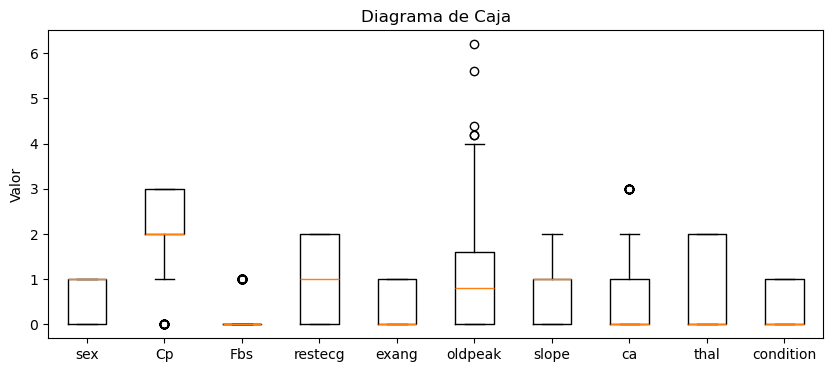

In [17]:
#Identificación de Datos Faltantes (No hay) y Atípicos
# Diagramas de caja para detectar valores atípicos para variables entre 0 y 7
plt.figure(figsize=(10, 4))
plt.boxplot([df['sex'], df['cp'], df['fbs'], df['restecg'], df['exang'], df['oldpeak'], df['slope'], df['ca'], df['thal'], df['condition']], 
        labels=['sex', 'Cp', 'Fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja')
plt.show()

In [8]:
# Solo muestra valores atípicos cp, fbs, oldpeak y ca, sin embargo son normales 
# de acuerdo a las características de cada variable

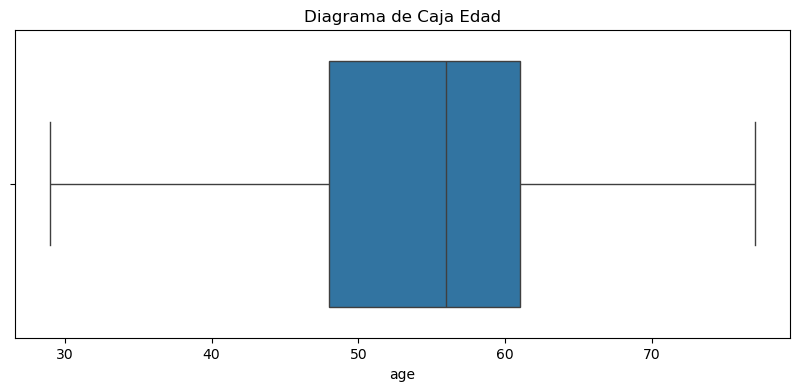

In [19]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['age'])
plt.title('Diagrama de Caja Edad')
plt.show()

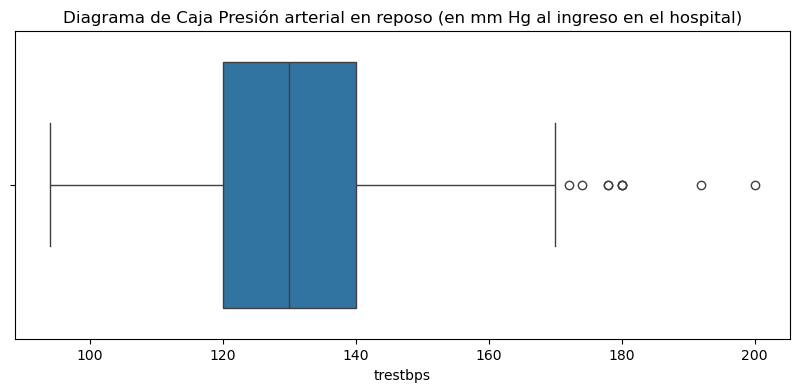

In [21]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['trestbps'])
plt.title('Diagrama de Caja Presión arterial en reposo (en mm Hg al ingreso en el hospital)')
plt.show()

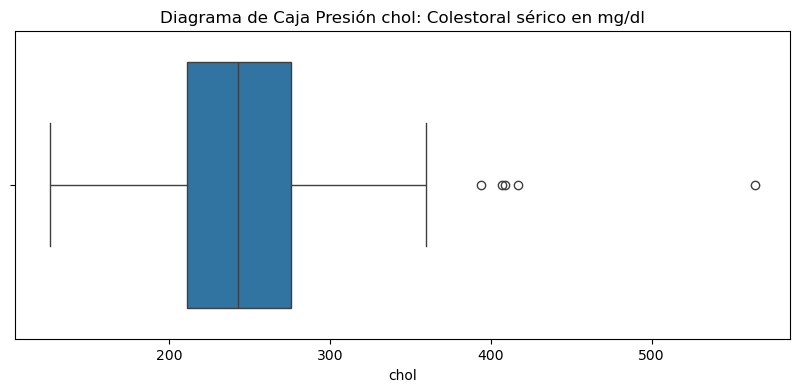

In [23]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['chol'])
plt.title('Diagrama de Caja Presión chol: Colestoral sérico en mg/dl')
plt.show()

In [12]:
# Se identifican valores por encima de 500 mg/dl, sin embargo es posible tener un nivel superior a 500 mg/dL1. Aunque es extremadamente alto y poco común (hipercolesterolemia familiar)

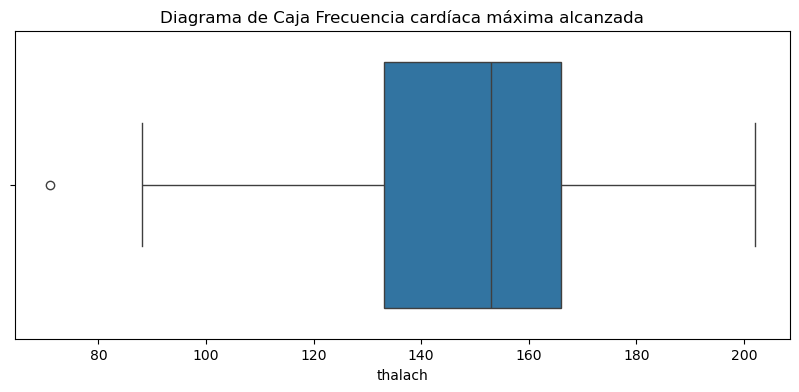

In [25]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['thalach'])
plt.title('Diagrama de Caja Frecuencia cardíaca máxima alcanzada')
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [27]:
# Verificar valores faltantes en el DataFrame
print(df.isna().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [29]:
# Se verifica la existencia de registros duplicados
print(f' Cantidad de registros duplicados es: ', df.duplicated().sum())

 Cantidad de registros duplicados es:  0


In [31]:
# De acuerdo a la informacion de df.describe() y df.info(), no se tienen datos nulos
# Se verifica la cantidad de datos atípicos en la variable oldpeak y chol

totalAtipicosOldpeak = ((df['oldpeak']>5).sum())
totalAtipicosChol = ((df['chol']>500).sum())

print("El total de datos atípicos de oldpeak es {}".format(totalAtipicosOldpeak))
print("El total de datos atípicos de chol es {}".format(totalAtipicosChol))

El total de datos atípicos de oldpeak es 2
El total de datos atípicos de chol es 1


In [18]:
# Considero que son un porcentaje muy pequeño que puede ser posible y no afectará el modelo

## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

En este caso de estudio la variable condition define con 0 la ausencia de enfermedad y 1 enfermo, por lo cual es la variable dependiente.

Las demás variables (12) aportan información valiosa para el entrenamiento y están aptas para iniciar el modelado

In [33]:
df['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [35]:
# Primer Modelo (train) = 75%, (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = df.drop('condition',axis=1) # Datos sin variable dependiente  
Y = df['condition'] # Datos variable dependiente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [37]:
# Observamos los datos de entrenamiento variables independientes (75%)
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [39]:
# Observamos los datos de entrenamiento variable dependientes (25%)
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


## 5. Entrenamiento del modelo de Regresión Logística

In [41]:
# Construir el modelo de regresión logística 

modelo = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión

# Se entrena con los datos destinados
modelo.fit (X_train , Y_train)   

# Crea el modelo de prediccion con los datos de test
prediccion = modelo.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


In [43]:
# Verifico las predicciones
print(prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


## 6 Evaluación del modelo de regresion creado

In [45]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [47]:
# Segundo Modelo (train) = 77%, (test) = 23%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = df.drop('condition',axis=1) # Datos sin variable dependiente  
Y = df['condition'] # Datos variable dependiente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.23, stratify=Y, random_state= 0)

# Construir el modelo de regresión logística 

modelo2 = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión

# Se entrena con los datos destinados
modelo2.fit (X_train2, Y_train2)   

# Crea el modelo de prediccion con los datos de test
prediccion2 = modelo2.predict(X_test2) # la función predict predice los valores a partir del conjunto de datos de validación

# Desempeño del modelo de regresión

print(classification_report(Y_test2,prediccion2))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.87      0.84      0.86        32

    accuracy                           0.87        69
   macro avg       0.87      0.87      0.87        69
weighted avg       0.87      0.87      0.87        69



In [83]:
# Tercer Modelo (train) = 80%, (test) = 20%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = df.drop('condition',axis=1) # Datos sin variable dependiente  
Y = df['condition'] # Datos variable dependiente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state= 0)

# Construir el modelo de regresión logística 

modelo3 = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión

# Se entrena con los datos destinados
modelo3.fit (X_train3 , Y_train3)   

# Crea el modelo de prediccion con los datos de test
prediccion3 = modelo3.predict(X_test3) # la función predict predice los valores a partir del conjunto de datos de validación

# Desempeño del modelo de regresión

print(classification_report(Y_test3,prediccion3))
Y_test3.value_counts()

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



condition
0    32
1    28
Name: count, dtype: int64

## 7 Graficas del modelo

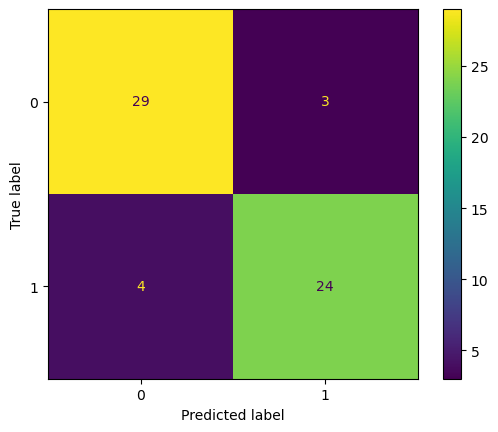

In [87]:
#Matrix de Confusión del modelo 3

cm=confusion_matrix(Y_test3,prediccion3)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

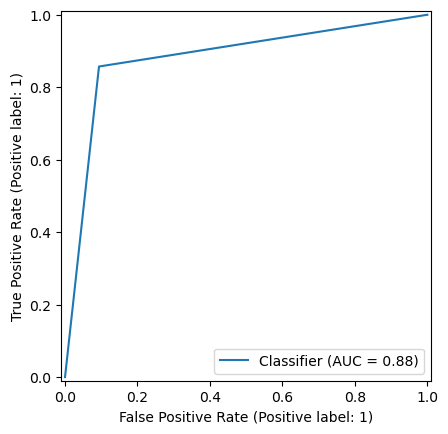

In [79]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion3)
plt.show()

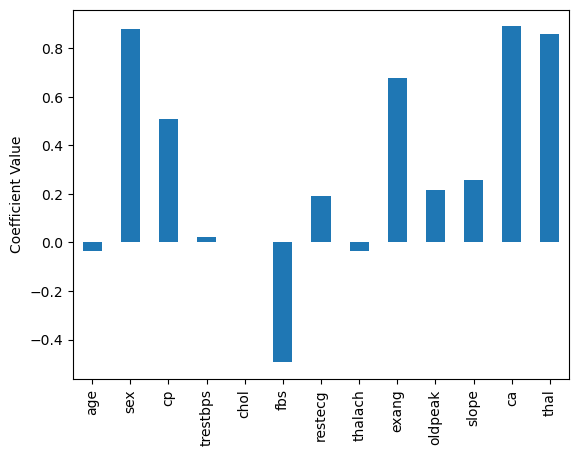

In [89]:
coefficients = pd.DataFrame(modelo3.coef_.T, X_train.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', legend=False)
plt.ylabel("Coefficient Value")
plt.show()

Este gráfico de coeficientes muestra la importancia de cada variable independiente del modelo, dejando ver que las variables sex, cp, exang, ca y thal son las que más aumentaron la probabilidad de la predicción, caso contrario a la variable fbs que es la que más disminuyó esta probabilidad.